# `First Order Phase Transition Resulting from Finite Inertia in Coupled Oscillator System`
| Hisa-Aki Tanaka, Allan J. Lichtenberg, and Shin'ichi Oishi   
| Phys. Rev. Lett. 78, 2104 – Published 17 March 1997

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.stats as scs
from TO_sim.gen_initial import Lorentzian,Normal

In [94]:
def Lorentzian_temp(N,mean = 0, sigma =1):
    '''return theta, omega, Kc'''
    
    init_theta = np.random.uniform(-np.pi,np.pi,size=N)
    init_omega = scs.cauchy.rvs(mean,sigma,N)
    Kc = 2/(np.pi*scs.cauchy.pdf(mean,mean,sigma))
    return init_theta,init_omega,Kc

def Normal_temp(N,mean = 0, sigma =1):
    '''return theta, omega, Kc'''
    init_theta = np.random.uniform(-np.pi,np.pi,size=N)
    init_omega = scs.norm.rvs(mean,sigma,N)
    Kc = 2/(np.pi*scs.norm.pdf(mean,mean,sigma))
    return init_theta,init_omega,Kc

In [29]:
N = 1000
theta, omega, Kc = Normal(N,0,1)
Aij = np.ones((N,N)) - np.eye(N)

# distribuiton shape | theta & omega
omega = Chauchy distribution

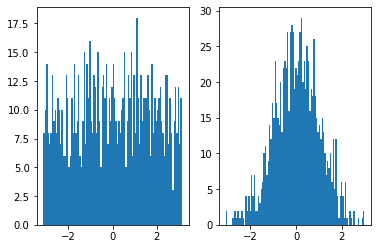

In [19]:
plt.subplot(121)
plt.hist(theta,bins = 100)
plt.subplot(122)
# omega_samp = omega[np.where(np.abs(omega)<2*np.pi)]
plt.hist(omega,bins = 100);

# 참고자료
[1. Damped harmonic oscillator](https://scipy-lectures.org/intro/scipy/auto_examples/plot_odeint_damped_spring_mass.html)  
[2. Damped harmonic oscillator with sinusoidal excitation force](https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Harmonic_Oscillator.html)

# TEST numpy vector broadcasting

## benchmark Meshgrid vs broadcasting 1
>> using broadcasting is much faster than Meshgrid

>> `ai, aj = np.meshgrid(a,a,sparse = True)`  
>> `ai.shape = (1,5)`  
>> `aj.shape = (5,1)`  

In [1]:
def Meshgrid(N):
    np.random.seed(0)
    a = np.random.rand(N)
    ai,aj = np.meshgrid(a,a,sparse=True)
    return Aij_temp*np.sin(aj-ai)

In [121]:
def Broad(N):
    np.random.seed(0)
    a = np.random.rand(1,N)
    return Aij_temp*np.sin(a.T-a)

In [124]:
N_temp = 10000
Aij_temp = np.ones((N_temp,N_temp)) - np.eye(N_temp)
Meshgrid(N_temp) == Broad(N_temp)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [125]:
%timeit Broad(N_temp)
%timeit Meshgrid(N_temp)


952 ms ± 5.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
954 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [90]:
temp = np.array([1,2,3,4,5])
ai,aj = np.meshgrid(temp,temp,sparse=True)

In [93]:
aj.shape

(5, 1)

## benchmark Meshgrid vs broadcasting 2
>> using already made theta
>> meshgrid sparse = True 로 해주는 편이 계산에서 빠름

In [4]:
get_aij_mij = lambda N: (np.ones((N,N)) - np.eye(N),N-1)
get_ai = lambda theta:theta.reshape(1,N)
N = 10

theta, omega, Kc = Lorentzian(N)
Aij,mij = get_aij_mij(N)
theta_i = get_ai(theta)

In [5]:
def Meshgrid(theta):
    ai,aj = np.meshgrid(theta,theta)
    return Aij* np.sin(aj-ai)

def Broad(theta):
    ai = theta.reshape(1,N)
    return Aij* np.sin(ai.T-ai)

In [8]:
(1/3)*np.sin(theta.reshape(1,N)-theta.reshape(N,1))

array([[ 0.        ,  0.31402969,  0.30271426,  0.24758394,  0.17571701,
        -0.23650875,  0.1046952 , -0.18155015,  0.06823499,  0.0442524 ],
       [-0.31402969,  0.        , -0.23299094, -0.2932943 , -0.32578246,
        -0.14197391,  0.26302725,  0.32425029, -0.33026318,  0.29640948],
       [-0.30271426,  0.23299094,  0.        , -0.0990338 , -0.1836722 ,
        -0.31233327,  0.33122706,  0.17786741, -0.26773661,  0.31856155],
       [-0.24758394,  0.2932943 ,  0.0990338 ,  0.        , -0.09273551,
        -0.33282562,  0.3051553 ,  0.08607956, -0.19665314,  0.2750224 ],
       [-0.17571701,  0.32578246,  0.1836722 ,  0.09273551,  0.        ,
        -0.32480251,  0.2557918 , -0.00690878, -0.11401183,  0.2117661 ],
       [ 0.23650875,  0.14197391,  0.31233327,  0.33282562,  0.32480251,
         0.        , -0.15076364, -0.32628575,  0.27958414, -0.20323158],
       [-0.1046952 , -0.26302725, -0.33122706, -0.3051553 , -0.2557918 ,
         0.15076364,  0.        ,  0.26016675

In [119]:
%timeit Broad(theta)
%timeit Meshgrid(theta)

1.44 s ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.86 s ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Simulation 2nd Kuramoto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.stats as scs
from TO_sim.gen_initial import Lorentzian,Normal

In [301]:
get_aij_mij = lambda N: (np.ones((N,N)) - np.eye(N),N-1)
N = 1000
K,m = 3,0
end, dt = 50,0.01
theta, omega, Kc = Normal(N)

Aij,mi = get_aij_mij(N)
t_init = np.arange(0,end+dt,dt)
Kc

1.5957691216057306

In [121]:
def Kuramoto_2nd(Theta,t):
    match m:
        case 0:
            # print("Case m = 0")
            theta = Theta[:N]
            ai,aj = np.meshgrid(theta,theta,sparse=True)
            interaction = (K/mi) * np.sin(aj-ai)
            dtheta = omega + interaction.sum(axis=0)
            return np.array([*dtheta,*np.zeros(N)])
        case _:
            # print(f"Case m = {m}") 
            theta,dtheta = Theta[:N],Theta[N:]
            ai,aj = np.meshgrid(theta,theta,sparse=True)
            interaction = (K/mi) * np.sin(aj-ai)
            ddtheta = (1/m)*(-dtheta + omega + interaction.sum(axis=0))
            return np.array([*dtheta,*ddtheta])

In [64]:
def RK4(f, y0, t, args=()):

    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [49]:
def test_case(m):
    match m:
        case 0: print("!m == 0")
        case _: print(f"m == {m}")

In [42]:
temp= np.array([1,2,3,4,5])

In [43]:
temp2 = np.array([*temp,*temp])

In [45]:
temp2[5:]

array([1, 2, 3, 4, 5])

In [168]:
theta = np.ones(N)

In [302]:
m=0
temp = RK4(Kuramoto_2nd,np.array([*theta,*np.zeros(N)]),t_init)
theta_s=temp[:,:N]
dtheta_s = temp[:,N:]
r_s = np.abs(np.sum(np.exp(1j*theta_s.T),axis=0))/N


In [303]:
m=0
thetar = np.ones(N)
temp_sr = RK4(Kuramoto_2nd,np.array([*thetar,*np.zeros(N)]),t_init)
theta_sr=temp_sr[:,:N]
dtheta_sr = temp_sr[:,N:]
r_sr = np.abs(np.sum(np.exp(1j*theta_sr.T),axis=0))/N


In [304]:
m = 4
temp2 = RK4(Kuramoto_2nd,np.array([*theta,*np.zeros(N)]),t_init)
theta_sm=temp2[:,:N]
dtheta_sm = temp2[:,N:]
r_sm = np.abs(np.sum(np.exp(1j*theta_sm.T),axis=0))/N

In [305]:
m = 4
temp2r = RK4(Kuramoto_2nd,np.array([*thetar,*np.zeros(N)]),t_init)
theta_smr=temp2r[:,:N]
dtheta_smr = temp2r[:,N:]
r_smr = np.abs(np.sum(np.exp(1j*theta_smr.T),axis=0))/N

In [227]:
theta_init = theta

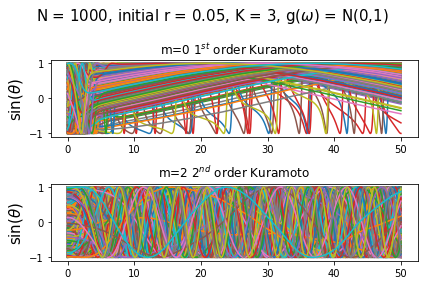

In [306]:
plt.subplot(211)
plt.plot(t_init,np.sin(theta_s));
plt.ylabel(r"$\sin(\theta)$",fontsize=15)
plt.title("m=0 $1^{st}$ order Kuramoto")

# plt.text(0,0.8,"m=0 1st Kuramoto")
plt.subplot(212)
plt.plot(t_init,np.sin(theta_sm));
plt.ylabel(r"$\sin(\theta)$",fontsize=15)
plt.title(r"m=2 $2^{nd}$ order Kuramoto")
plt.suptitle(f"N = {N}, initial r = {r_s[0]:.02f}, K = {K}, g($\omega$) = N(0,1)", y=0.98,fontsize=15)
plt.tight_layout()

# plt.text(0,0.8,f"m=2 2nd Kuramoto")

plt.savefig(f"N=100/N = {N} time vs sin theta,r = {r_s[0]:.02f}.png",dpi=400)

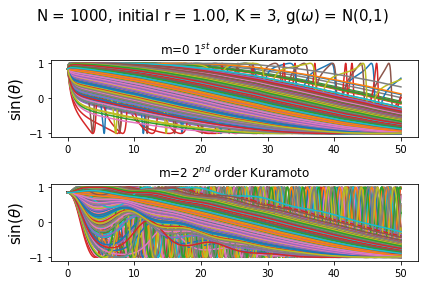

In [307]:
plt.subplot(211)
plt.plot(t_init,np.sin(theta_sr));
plt.ylabel(r"$\sin(\theta)$",fontsize=15)
plt.title("m=0 $1^{st}$ order Kuramoto")

# plt.text(0,0.8,"m=0 1st Kuramoto")
plt.subplot(212)
plt.plot(t_init,np.sin(theta_smr));
plt.ylabel(r"$\sin(\theta)$",fontsize=15)
plt.title(r"m=2 $2^{nd}$ order Kuramoto")
plt.suptitle(f"N = {N}, initial r = {r_sr[0]:.02f}, K = {K}, g($\omega$) = N(0,1)", y=0.98,fontsize=15)
plt.tight_layout()
# plt.text(0,0.8,f"m=2 2nd Kuramoto")

plt.savefig(f"N=100/N = {N} time vs sin theta, r = {r_sr[0]:.02f}.png",dpi=400)

In [308]:
temp_theta = theta_sm[-1].reshape(1,N)

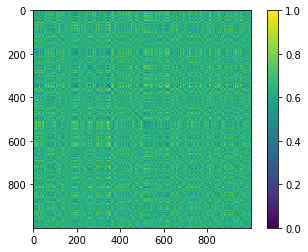

In [309]:

plt.imshow(abs(np.sin(temp_theta.T-temp_theta)))
plt.colorbar()

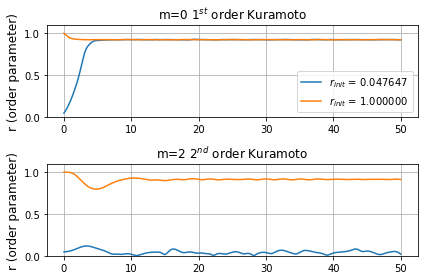

In [310]:
plt.subplot(211)
plt.plot(t_init,r_s,label = "$r_{init}$ = %f"% (r_s[0]));
plt.plot(t_init,r_sr,label = "$r_{init}$ = %f"% (r_sr[0]));
plt.ylabel(r"r (order parameter)",fontsize=12)
plt.ylim(0,1.1)
plt.title("m=0 $1^{st}$ order Kuramoto")
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(t_init,r_sm);
plt.plot(t_init,r_smr);
plt.ylabel(r"r (order parameter)",fontsize=12)
plt.ylim(0,1.1)
plt.title("m=2 $2^{nd}$ order Kuramoto")
plt.grid()

plt.tight_layout()
plt.savefig(f"N=100/N = {N} time vs r.png",dpi=400)

## compare with Mean field model

In [311]:
def get_order_parameter(theta,N):
    ''' get theta and return r and theta'''
    rpsi = 1/N*np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi
def Kuramoto_2nd_mf(Theta,t):
    match m:
        case 0:
            # print("Case m = 0")
            theta = Theta[:N]
            r,psi = get_order_parameter(theta,N)
            dtheta = omega + K*r*np.sin(psi - theta)
            return np.array([*dtheta,*np.zeros(N)])
        case _:
            # print(f"Case m = {m}") 
            theta,dtheta = Theta[:N],Theta[N:]
            r,psi = get_order_parameter(theta,N)
            ai,aj = np.meshgrid(theta,theta,sparse=True)
            ddtheta = (1/m)*(-dtheta + omega + K*r*np.sin(psi - theta))
            return np.array([*dtheta,*ddtheta])

In [312]:
m=0
temp_mf = RK4(Kuramoto_2nd_mf,np.array([*theta,*np.zeros(N)]),t_init)
theta_s_mf=temp_mf[:,:N]
dtheta_s_mf = temp_mf[:,N:]
r_s_mf = np.abs(np.sum(np.exp(1j*theta_s_mf.T),axis=0))/N

m=0
thetar = np.ones(N)
temp_sr_mf = RK4(Kuramoto_2nd_mf,np.array([*thetar,*np.zeros(N)]),t_init)
theta_sr_mf=temp_sr_mf[:,:N]
dtheta_sr_mf = temp_sr_mf[:,N:]
r_sr_mf = np.abs(np.sum(np.exp(1j*theta_sr_mf.T),axis=0))/N

m = 4
temp2_mf = RK4(Kuramoto_2nd_mf,np.array([*theta,*np.zeros(N)]),t_init)
theta_sm_mf=temp2_mf[:,:N]
dtheta_sm_mf = temp2_mf[:,N:]
r_sm_mf = np.abs(np.sum(np.exp(1j*theta_sm_mf.T),axis=0))/N
m = 4
temp2r_mf = RK4(Kuramoto_2nd_mf,np.array([*thetar,*np.zeros(N)]),t_init)
theta_smr_mf=temp2r_mf[:,:N]
dtheta_smr_mf = temp2r_mf[:,N:]
r_smr_mf = np.abs(np.sum(np.exp(1j*theta_smr_mf.T),axis=0))/N

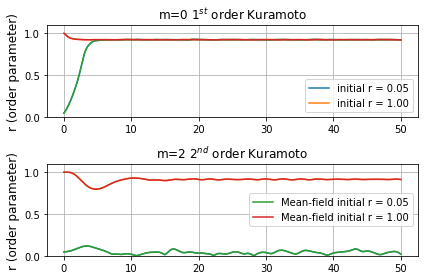

In [402]:
plt.subplot(211)
plt.plot(t_init,r_s,label = f"initial r = {r_sm[0]:.02f}");
plt.plot(t_init,r_sr,label = f"initial r = {r_sr[0]:.02f}");

plt.plot(t_init,r_s_mf);
plt.plot(t_init,r_sr_mf);
plt.ylabel(r"r (order parameter)",fontsize=12)
plt.ylim(0,1.1)
plt.title("m=0 $1^{st}$ order Kuramoto")
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(t_init,r_sm);
plt.plot(t_init,r_smr);

plt.plot(t_init,r_sm_mf,label = f"Mean-field initial r = {r_sm[0]:.02f}");
plt.plot(t_init,r_smr_mf,label = f"Mean-field initial r = {r_smr[0]:.02f}");
plt.ylabel(r"r (order parameter)",fontsize=12)
plt.ylim(0,1.1)
plt.title("m=2 $2^{nd}$ order Kuramoto")
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig(f"N=100/N = {N} time vs r w.mf .png",dpi=400)

([<matplotlib.axis.YTick at 0x2510b7b1780>,
 [Text(0, 0, 'False'), Text(0, 1, 'True')])

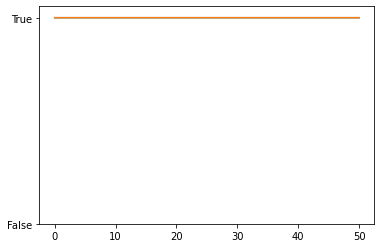

In [365]:
plt.plot(t_init,np.isclose(r_sm,r_sm_mf,rtol=1e-5, atol=2e-4))
plt.plot(t_init,np.isclose(r_smr,r_smr_mf,rtol=1e-5, atol=7.9e-4))
plt.yticks([0,1],labels=['False','True'])
# plt.yticklabels(['False','True'])
# plt.plot()


In [415]:
t_init.shape

(5001,)

In [413]:
r_sm[0]

0.047647408518185295

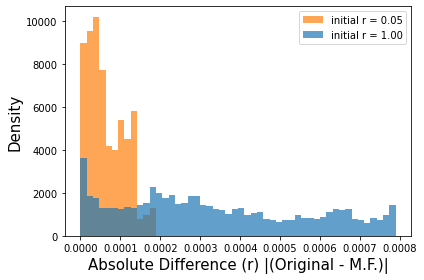

In [414]:
plt.hist([abs(r_smr-r_smr_mf),abs(r_sm-r_sm_mf)],density=True,bins=50,alpha=0.7, histtype='stepfilled',label = [f"initial r = {r_smr[0]:.02f}",f"initial r = {r_sm[0]:.02f}"])
# plt.hist(abs(r_sm-r_sm_mf),bins=15,alpha=0.7, histtype='stepfilled',label = f"initial r = {r_smr[0]:.02f}")
plt.legend()
plt.xlabel('Absolute Difference (r) |(Original - M.F.)|',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.tight_layout()
plt.savefig(f"N=100/N = {N} histogram between mf .png",dpi=400)
